In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import string

In [2]:
#read from file as list
df =  pd.read_csv('data/sachin-stats.csv',sep=',')
start_date_str = "18 Dec 1989"
end_date_str   = "23 Dec 2012"

In [3]:
def get_date(date_str):
    Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for index,month in enumerate(Months):
        if month in date_str:
            split_str = string.split(date_str, " ")
            d = date(int(split_str[2]), index+1, int(split_str[0]))
            return d
        else:
            continue
    return ""

In [4]:
start_date = get_date(start_date_str)
end_date   = get_date(end_date_str)
number_of_days = (end_date - start_date).days
print ("Total number of days = ", number_of_days)

('Total number of days = ', 8406)


In [5]:
avg_k_matches = 5
rows, cols = df.shape

#Input
avg_k_list = []
odi_date_list = []

# Output
odi_runs_list = []

for loop_index_1 in range(avg_k_matches, rows):
    # Get Average score from last K matches
    sum_count = 0
    for loop_index_2 in range(0, avg_k_matches):
        run = df.iloc[loop_index_1-loop_index_2-1][1]
        if run == "DNB" or run == "TDNB":
            run = 0
        elif run.endswith("*"): 
            run = run[:-1]
        sum_count = sum_count + int(run)
    avg_k_list.append(float(sum_count)/avg_k_matches)
    
    # Get ODI Date
    match_date_str = df.iloc[loop_index_1][13]
    match_date = get_date(match_date_str)
    
    odi_threshold = float((match_date - start_date).days) / number_of_days
    odi_date_list.append(odi_threshold)
    
    # Get ODI runs
    run = df.iloc[loop_index_1][1]
    if run == "DNB" or run == "TDNB":
        run = 0
    elif run.endswith("*"):
        run = run[:1]
    odi_runs_list.append(int(run))
     

In [6]:
fit_p = np.polyfit(avg_k_list, odi_runs_list,1)
fit_fn_p = np.poly1d(fit_p) 

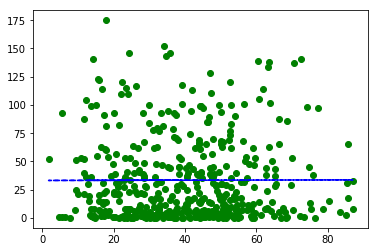

In [7]:
plt.plot(avg_k_list,odi_runs_list, 'go', avg_k_list, fit_fn_p(avg_k_list), '--b')

In [11]:
def Get_Hypothesis_val(w1,w2,b,x1,x2):
    # Get Hypthesis value
    #Linear regression: Fitting first degree polynomial
    return ((w1*x1) + (w2*x2) + b)  

def Calculate_loss(y, yH, m):
    # Mean squared error
    error_list = yH - y
    squared_error_list = error_list**2
    mean_square_error = (squared_error_list.sum())/2*m
    return (mean_square_error)

def Update_weights(x1, x2, y, yH, w1, w2, b, learning_rate):
    error_list = (yH - y)
    w1_grad = np.dot(error_list, x1)
    w2_grad = np.dot(error_list, x2)
    b_grad  = error_list.sum()
    w1 = w1 - (learning_rate * w1_grad)
    w2 = w2 - (learning_rate * w2_grad)
    b  = b  - (learning_rate * b_grad) 
    return w1, w2, b
    
def Fit_my_model(x1,x2,y,learning_rate, iterations):
    #initial weight set up
    w1 = 0.0001
    w2 = 0.0001
    b  = 0.0001
    x1 = np.array(x1)
    x2 = np.array(x2)
    y  = np.array(y)
    m  = len(x1)
    loss_vector = []
    for index in range(0,iterations):
        yH   = Get_Hypothesis_val(w1,w2,b,x1,x2)
        loss_vector.append(Calculate_loss(y, yH, m))
        w1, w2, b = Update_weights(x1, x2, y, yH, w1, w2, b, learning_rate)
    return loss_vector
    
        

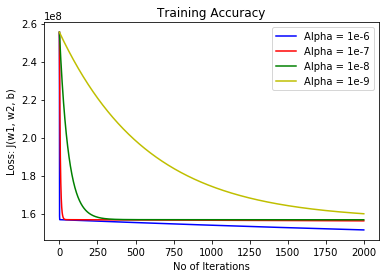

In [29]:
training_iterations = 2000

loss_vector0 = Fit_my_model(avg_k_list, odi_date_list, odi_runs_list, 1e-6, training_iterations)
loss_vector1 = Fit_my_model(avg_k_list, odi_date_list, odi_runs_list, 1e-7, training_iterations)
loss_vector2 = Fit_my_model(avg_k_list, odi_date_list, odi_runs_list, 1e-8, training_iterations)
loss_vector3 = Fit_my_model(avg_k_list, odi_date_list, odi_runs_list, 1e-9, training_iterations)

plt.title("Training Accuracy")
plt.plot(range(0,training_iterations), loss_vector0, 'b', loss_vector1, 'r',  loss_vector2, 'g',  loss_vector3, 'y')
plt.xlabel('No of Iterations')
plt.ylabel( 'Loss: J(w1, w2, b)')
plt.legend(['Alpha = 1e-6', 'Alpha = 1e-7', 'Alpha = 1e-8', 'Alpha = 1e-9'])
#plt.axis([0,5000, 0, 2.6*1e8])
plt.show()